In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans


In [22]:
GCF08 = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\structured\emotion\GC2008.csv")    # General Fund Summary 2008 #
GCF08.drop(['Unnamed: 0'], axis=1,inplace=True)

In [23]:
GCF08_vc = GCF08.word.value_counts()
GCF08_vc.head()

Emergency    48
General      40
Attorney     36
Court        36
Public       36
Name: word, dtype: int64

In [28]:
GCF08.sentiment = GCF08.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [25]:
GCF08.head(20)

,page_number,word,sent_count,sentiment,category
0,19,County,20,2,Emotion
1,1,Tax,17,0,Sentiment
2,1,Tax,17,0,Emotion
3,7,Debt,17,0,Sentiment
4,7,Debt,17,0,Emotion
5,7,School,15,2,Emotion
6,3,Tax,14,0,Sentiment
7,3,Tax,14,0,Emotion
8,10,Debt,13,0,Sentiment
9,10,Debt,13,0,Emotion


In [5]:
GCF08.sentiment.value_counts()

1    383
2    267
0    218
3    151
5     96
6     71
7     28
8     28
4     24
Name: sentiment, dtype: int64

In [30]:
GCF08['sentiment'] = pd.to_numeric(GCF08['sentiment'])
GCF08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 5 columns):
page_number    1266 non-null int64
word           1266 non-null object
sent_count     1266 non-null int64
sentiment      1266 non-null int64
category       1266 non-null object
dtypes: int64(3), object(2)
memory usage: 49.5+ KB


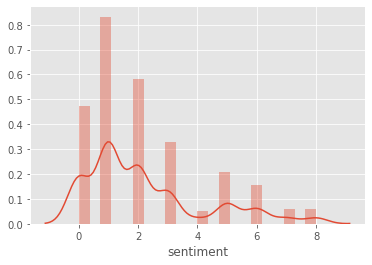

In [32]:
sns.distplot(GCF08.sentiment)

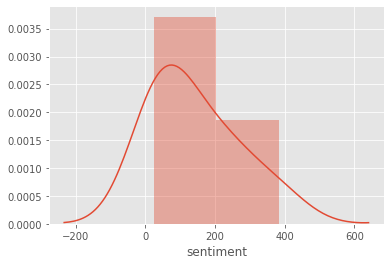

In [8]:
sns.distplot(GCF08.sentiment.value_counts())

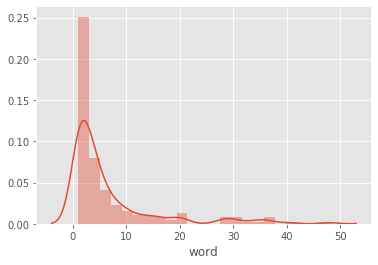

In [9]:
sns.distplot(GCF08_vc)

In [10]:
GCF08.drop("category",axis=1,inplace=True)
GCF08.drop("page_number",axis=1,inplace=True)
GCF08.drop("sent_count",axis=1,inplace=True)

In [46]:
v = GCF08.to_numpy(copy=True)
v

array([['County', 2],
       ['Tax', 0],
       ['Tax', 0],
       ...,
       ['Legal', 2],
       ['Policy', 2],
       ['Resources', 2]], dtype=object)

In [33]:
#clf = KMeans(n_clusters = 8)
#clf.fit(GCF08)

In [13]:
GCF08.sentiment = GCF08.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"1","Sadness":"0","Anticipation":"1","Surprise":"1","Fear":"0","Joy":"1","Anger":"0","Disgust":"0"})

In [15]:
GCF08['sentiment'] = pd.to_numeric(GCF08['sentiment'])
GCF08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 5 columns):
page_number    1266 non-null int64
word           1266 non-null object
sent_count     1266 non-null int64
sentiment      1266 non-null int64
category       1266 non-null object
dtypes: int64(3), object(2)
memory usage: 49.5+ KB


TypeError: unsupported operand type(s) for /: 'str' and 'int'

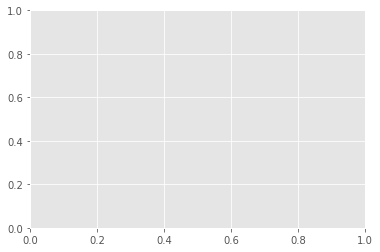

In [26]:
sns.distplot(GCF08.sentiment,kde=False)

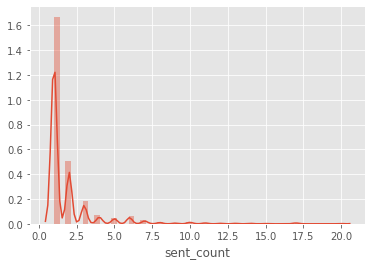

In [17]:
sns.distplot(GCF08.sent_count)

In [20]:
GCF08.tail(20)

,page_number,word,sent_count,sentiment,category
1246,19,Resources,1,1,Emotion
1247,19,System,1,1,Emotion
1248,20,Attorney,1,0,Emotion
1249,20,Public,1,1,Emotion
1250,20,Attorney,1,0,Emotion
1251,20,Resources,1,1,Emotion
1252,20,Decrease,1,0,Sentiment
1253,20,Tax,1,0,Sentiment
1254,20,Attorney,1,1,Sentiment
1255,20,Include,1,1,Sentiment


In [34]:
CCE = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\FY2008\structured\emotion\CharlotteCityEmotionDataFY08.csv")
CCE.drop(['Unnamed: 0'], axis=1,inplace=True)

In [35]:
CCE.sentiment = CCE.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [36]:
CCE.sentiment = pd.to_numeric(CCE['sentiment'])

In [38]:
sentiment_mean = CCE.sentiment.mean()
sentiment_mean

2.2300422780402887

In [39]:
sentiment_var = CCE.sentiment.var()
sentiment_var

3.986870014379548

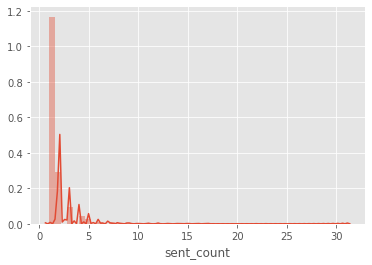

In [41]:
sns.distplot(CCE.sent_count)

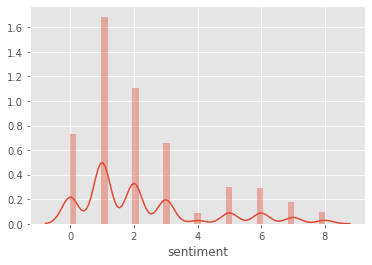

In [42]:
sns.distplot(CCE['sentiment'])